<a href="https://colab.research.google.com/github/Sophia124990/Tareas_CienciaDatos/blob/main/TAREA18_SOPHIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#autor: Karla Sophia López González
#idautor: 225594-2
#profesor: Lázaro Bustio Martínez

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage


In [3]:
clientes = pd.read_csv("/content/datos_clientes.csv")
clientes.head(3)

,Nombre,Edad,Ingresos,Gasto,Puntuacion
0,Cliente 1,62.0,29.141937,NaN,NaN
1,Cliente 2,18.0,33.006840,0.193168,19.0
2,Cliente 3,21.0,32.953060,1.000000,90.0


In [5]:
clientes.describe()

,Edad,Ingresos,Gasto,Puntuacion
count,483.000000,540.000000,540.000000,546.000000
mean,44.304348,29.184647,0.290031,56.780220
std,19.730459,22.064182,0.221071,45.537355
min,18.000000,1.559945,0.013863,1.000000
25%,30.000000,12.764645,0.136138,22.000000
50%,42.000000,26.888401,0.233527,49.500000
75%,56.000000,38.969482,0.403827,81.000000
max,100.000000,100.000000,1.000000,200.000000


In [11]:
# Verificar si hay valores faltantes
print(clientes.isnull().sum())

# Verificar si hay valores duplicados
print(clientes.duplicated().sum())

Nombre          0
Edad          117
Ingresos       60
Gasto          60
Puntuacion     54
dtype: int64
400


<ipython-input-12-7e2d895aa28e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes[['Edad', 'Ingresos', 'Gasto', 'Puntuacion']] = imputer.fit_transform(clientes[['Edad', 'Ingresos', 'Gasto', 'Puntuacion']])


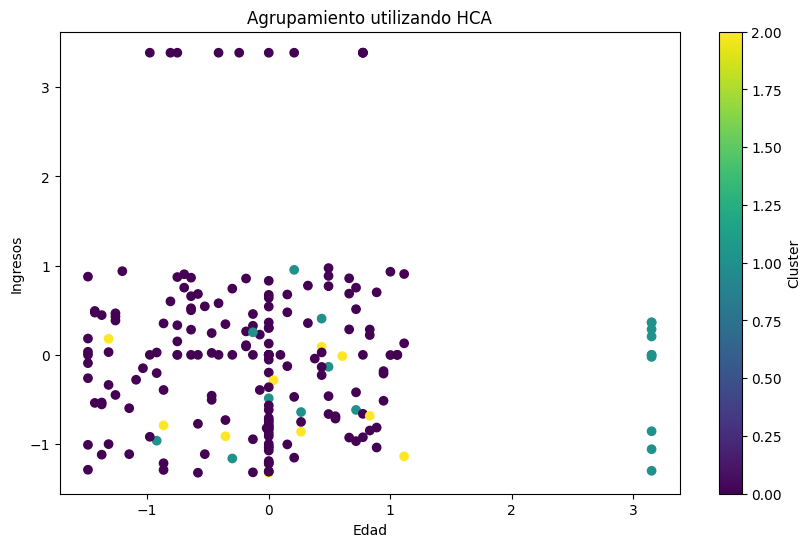

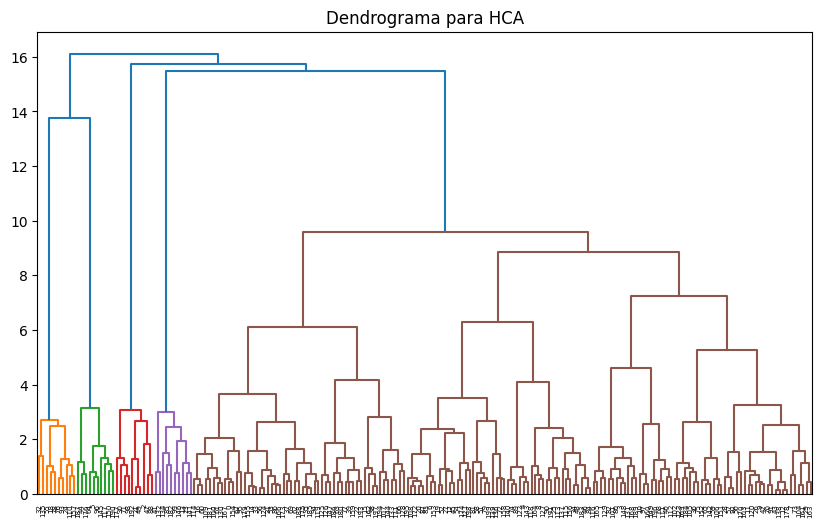

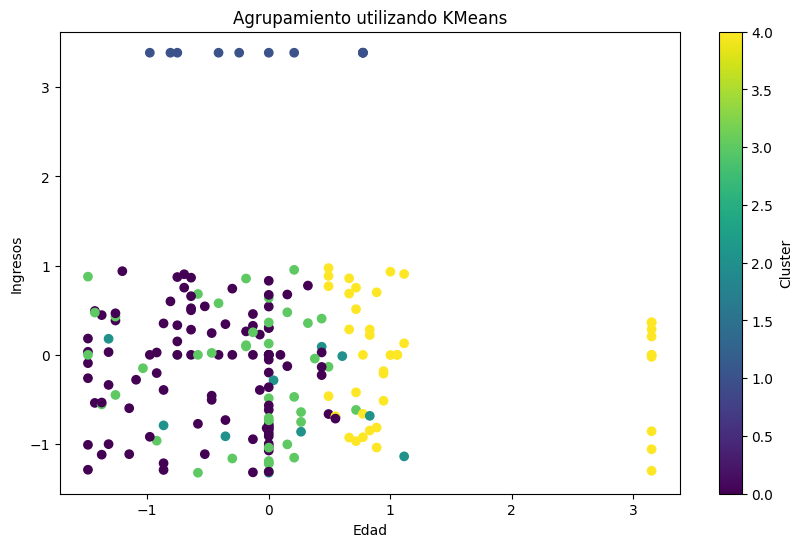

In [12]:
# Eliminar filas duplicadas
clientes = clientes.drop_duplicates()

# Manejar valores faltantes
imputer = SimpleImputer(strategy='mean')
clientes[['Edad', 'Ingresos', 'Gasto', 'Puntuacion']] = imputer.fit_transform(clientes[['Edad', 'Ingresos', 'Gasto', 'Puntuacion']])

# Escalar los datos
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes[['Edad', 'Ingresos', 'Gasto', 'Puntuacion']])

# HCA
hca = AgglomerativeClustering(n_clusters=3)
hca_clusters = hca.fit_predict(clientes_scaled)

# KMeans
kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(clientes_scaled)

# Visualización de HCA
plt.figure(figsize=(10, 6))
plt.title("Agrupamiento utilizando HCA")
plt.scatter(clientes_scaled[:, 0], clientes_scaled[:, 1], c=hca_clusters, cmap='viridis')
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.colorbar(label="Cluster")
plt.show()

# Dendrograma para HCA
plt.figure(figsize=(10, 6))
plt.title("Dendrograma para HCA")
linkage_matrix = linkage(clientes_scaled, "ward")
dendrogram(linkage_matrix)
plt.show()

# Visualización de KMeans
plt.figure(figsize=(10, 6))
plt.title("Agrupamiento utilizando KMeans")
plt.scatter(clientes_scaled[:, 0], clientes_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.colorbar(label="Cluster")
plt.show()

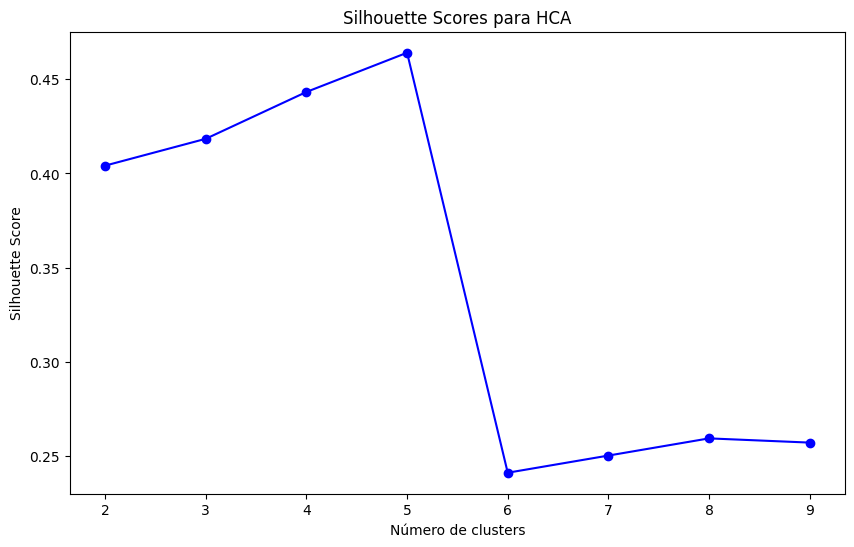

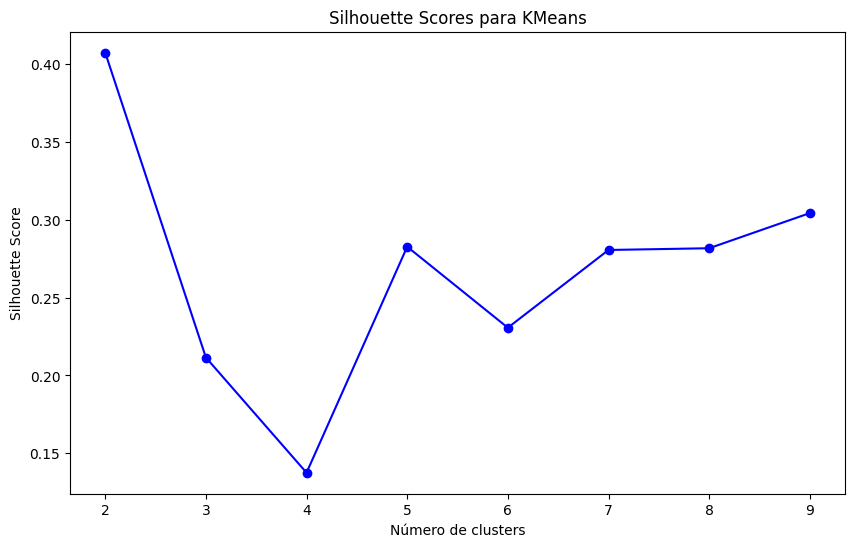

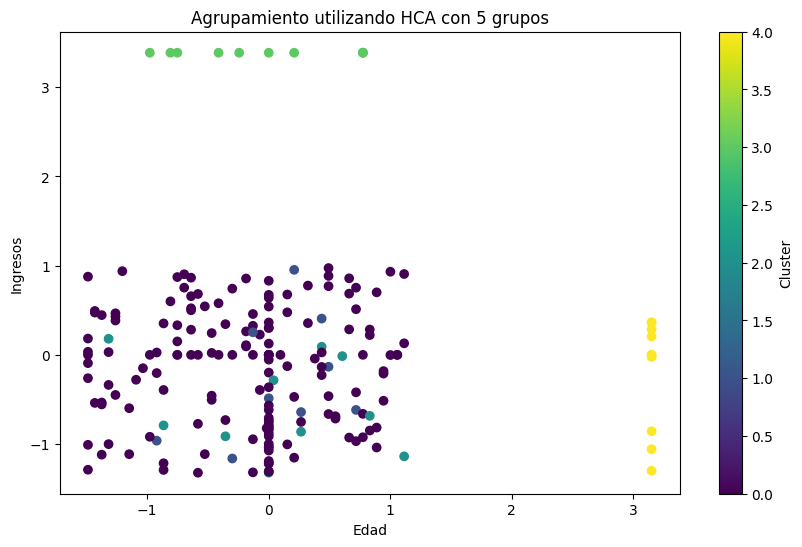

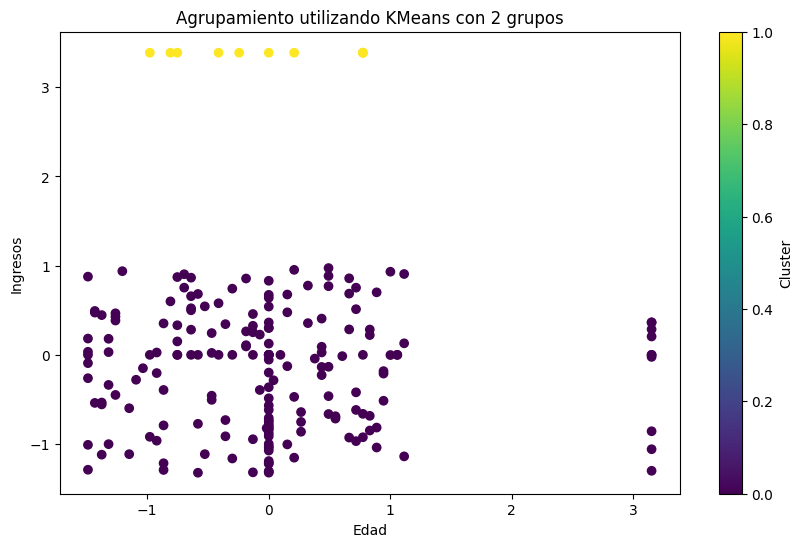

In [13]:
# prompt: e)	Obtener el número óptimo de grupos para cada algoritmo, y rehacer el agrupamiento para el número óptimo obtenido.
# f)	Analizar e interpretar los resultados de cada algoritmo. Ofrecer conclusiones basadas en la interpretación de los grupos/clusters obtenidos.

# e) Obtener el número óptimo de grupos para cada algoritmo

# HCA
silhouette_scores_hca = []
for n_clusters in range(2, 10):
    hca = AgglomerativeClustering(n_clusters=n_clusters)
    hca_clusters = hca.fit_predict(clientes_scaled)
    silhouette_scores_hca.append(silhouette_score(clientes_scaled, hca_clusters))

# KMeans
silhouette_scores_kmeans = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_clusters = kmeans.fit_predict(clientes_scaled)
    silhouette_scores_kmeans.append(silhouette_score(clientes_scaled, kmeans_clusters))

# Gráficas de silhouette scores
plt.figure(figsize=(10, 6))
plt.title("Silhouette Scores para HCA")
plt.plot(range(2, 10), silhouette_scores_hca, 'bo-')
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Silhouette Scores para KMeans")
plt.plot(range(2, 10), silhouette_scores_kmeans, 'bo-')
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Rehacer el agrupamiento para el número óptimo obtenido
# HCA
optimal_n_clusters_hca = silhouette_scores_hca.index(max(silhouette_scores_hca)) + 2
hca = AgglomerativeClustering(n_clusters=optimal_n_clusters_hca)
hca_clusters = hca.fit_predict(clientes_scaled)

# KMeans
optimal_n_clusters_kmeans = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2
kmeans = KMeans(n_clusters=optimal_n_clusters_kmeans)
kmeans_clusters = kmeans.fit_predict(clientes_scaled)

# f) Analizar e interpretar los resultados de cada algoritmo

# HCA
plt.figure(figsize=(10, 6))
plt.title("Agrupamiento utilizando HCA con {} grupos".format(optimal_n_clusters_hca))
plt.scatter(clientes_scaled[:, 0], clientes_scaled[:, 1], c=hca_clusters, cmap='viridis')
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.colorbar(label="Cluster")
plt.show()

# KMeans
plt.figure(figsize=(10, 6))
plt.title("Agrupamiento utilizando KMeans con {} grupos".format(optimal_n_clusters_kmeans))
plt.scatter(clientes_scaled[:, 0], clientes_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.colorbar(label="Cluster")
plt.show()

